In [1]:
# Imports
import pandas as pd
from IPython.display import display
# Import datatypes for parameter type specification

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Produce knn boundary graphs
from sklearn.inspection import DecisionBoundaryDisplay
import seaborn as sns


# labels for pairwise plots
from sklearn.preprocessing._label import LabelEncoder

Read the scaled data from files. Store the features and targets to variables. These variables will be used for train-test splitting.

In [2]:
df = pd.read_csv("clean1_Ford.csv")

mpg_weight = 7.0

# use mpg_col_name to rename the columns after adjusting the "mpg scaled" feature
mpg_col_name = "mpg scaled * " + str(mpg_weight)
print("mpg_col_name: '" + mpg_col_name + "'")

mpg_col_name: 'mpg scaled * 7.0'


In [3]:
# read scaled data for non-target attributes
X_scaled = pd.read_csv("X_scaled.csv")

# read the target attribute
y = pd.read_csv("y.csv")

Read scaled data from files for the secondary dataset.

In [4]:
X2_scaled = pd.read_csv("X2_scaled.csv")

y2 = pd.read_csv("y2.csv")

### study interactions
Divide data into training and test sets

In [5]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y,
    # random_state=0
)
X2_train_scaled, X2_test_scaled, y2_train, y2_test = train_test_split(
    X2_scaled, y2, 
    # random_state=0
)

### Plot a 2d knn as an example

##### Select two attributes for the example KNN model

In [6]:
names_2d = [mpg_col_name, "price scaled"]

# primary dataset
X_2d_train = X_train_scaled.loc[:, names_2d]
X_2d_train = X_2d_train.reset_index(drop=True)
y_train = np.ravel(y_train)

# secondary dataset
X2_2d_train = X2_train_scaled.loc[:, names_2d]
X2_2d_train = X2_2d_train.reset_index(drop=True)
y2_train = np.ravel(y2_train)

##### Build the sample model from the training set
- show boundaries for the trained model.
- points from the training set are labeled based on the car models

In [7]:
# choose points in the primary dataset to plot for better visualization
mask = X_2d_train[mpg_col_name] > 5.0
index = X_2d_train.loc[mask].index
X_2d_train_plottable = X_2d_train.drop(index=index, axis=1)
# y_train_plottable = y_train[index.to_numpy()]

reverse_index = X_2d_train.loc[~mask].index.to_numpy()
y_train_plottable = y_train[reverse_index]
display(y_train, X_2d_train)

array([' Focus', ' Galaxy', ' Fiesta', ..., ' Fiesta', ' B-MAX', ' Kuga'],
      dtype=object)

,mpg scaled * 7.0,price scaled
0,1.570166,0.205505
1,0.877901,0.357706
2,1.295580,0.155303
3,2.069061,0.137688
4,1.736464,0.220239
...,...,...
12493,1.113812,0.311927
12494,1.473481,0.243028
12495,1.736464,0.156000
12496,0.901105,0.137505


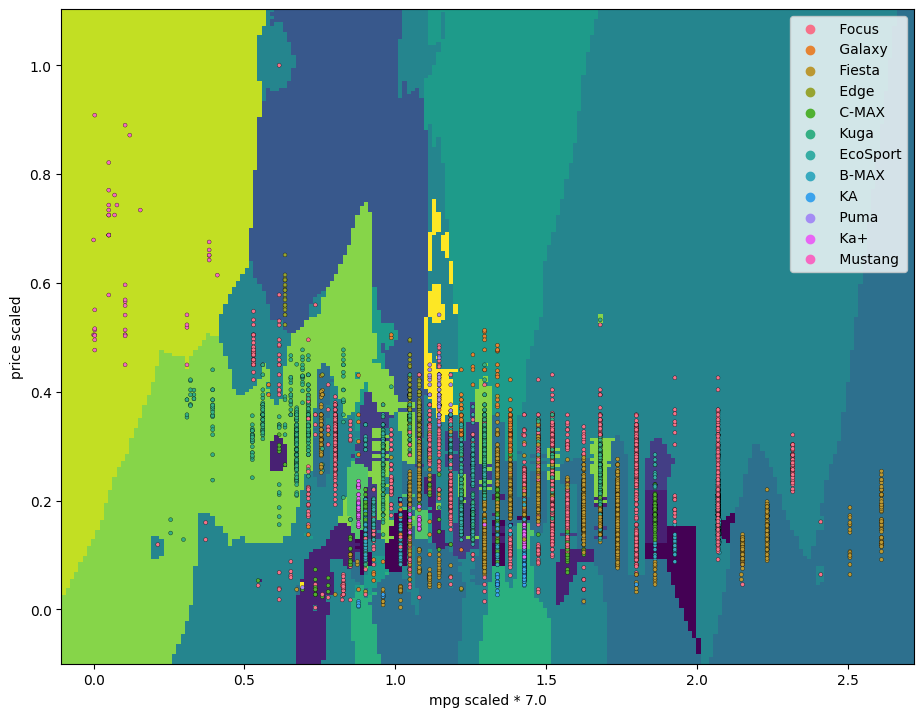

In [8]:
knn = KNeighborsClassifier(n_neighbors=9, weights="distance")
knn.fit(X_2d_train, y_train)
_, ax = plt.subplots()

DecisionBoundaryDisplay.from_estimator(
    knn,
    X_2d_train_plottable,
    grid_resolution=200,
    eps=0.1,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    xlabel=names_2d[0],
    ylabel=names_2d[1],
    shading="auto",
)

# Plot also the training points
sns.scatterplot(
    x=X_2d_train_plottable[names_2d[0]],
    y=X_2d_train_plottable[names_2d[1]],
    hue=y_train_plottable,
    alpha=1.0,
    edgecolor="black",
    s=8
)

plt.gcf().set_size_inches(11, 8.5)
plt.gcf().align_xlabels()

plt.show()


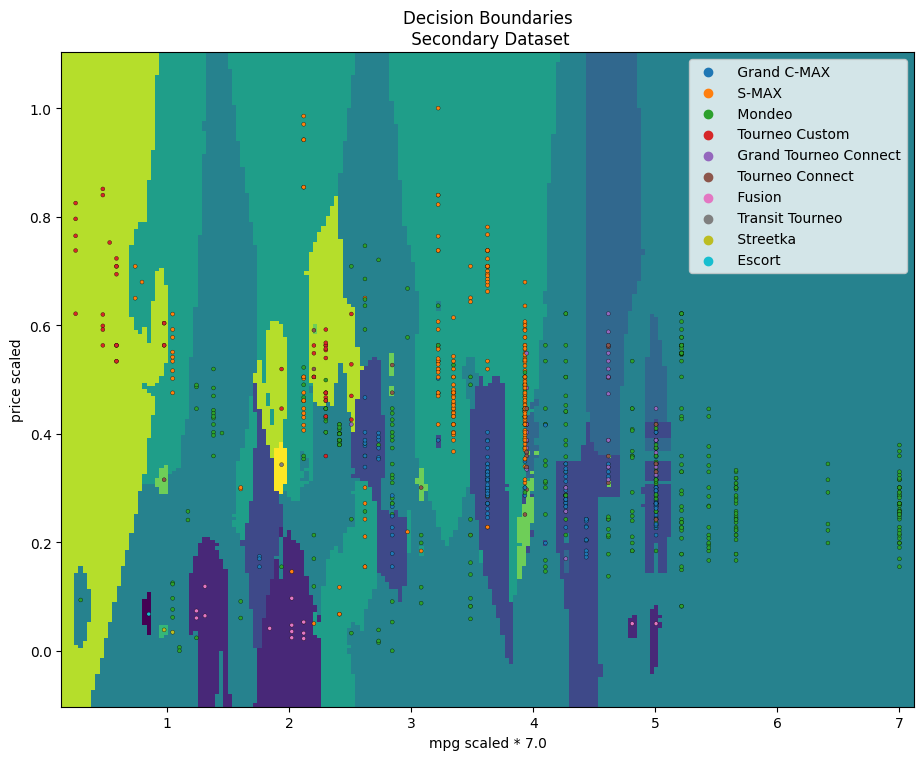

In [9]:
knn = KNeighborsClassifier(n_neighbors=9, weights="distance")
knn.fit(X2_2d_train, y2_train)
_, ax = plt.subplots()

DecisionBoundaryDisplay.from_estimator(
    knn,
    X2_2d_train,
    grid_resolution=200,
    eps=0.1,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    xlabel=names_2d[0],
    ylabel=names_2d[1],
    shading="auto",
)

# Plot also the training points
sns.scatterplot(
    x=X2_2d_train[names_2d[0]],
    y=X2_2d_train[names_2d[1]],
    hue=y2_train,
    alpha=1.0,
    edgecolor="black",
    s=8,
)

plt.gcf().set_size_inches(11, 8.5)
plt.gcf().align_xlabels()
plt.title("Decision Boundaries\n Secondary Dataset")

plt.show()


### Assess accuracy for the sample KNN model

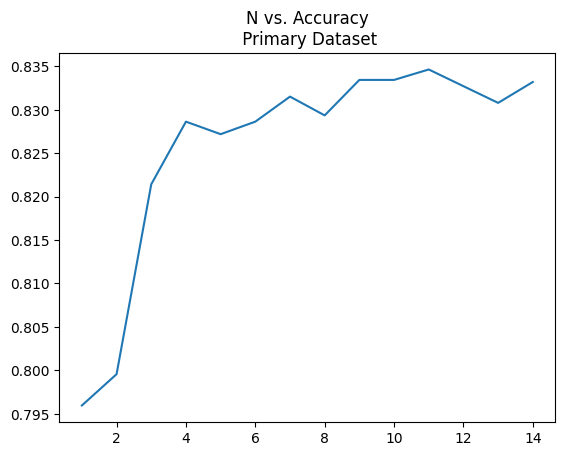

In [10]:
X_2d_test = X_test_scaled.loc[:,[names_2d[0],names_2d[1]]]

arr = np.array([])
y_test = y_test.squeeze()
for n in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_2d_train, y_train)
    y_predict = knn.predict(X_2d_test)
    m = np.mean(y_predict == y_test)
    arr = np.append(arr, np.array(m))
plt.plot(range(1, arr.size+1), arr)
plt.title("N vs. Accuracy\n Primary Dataset")
plt.show()

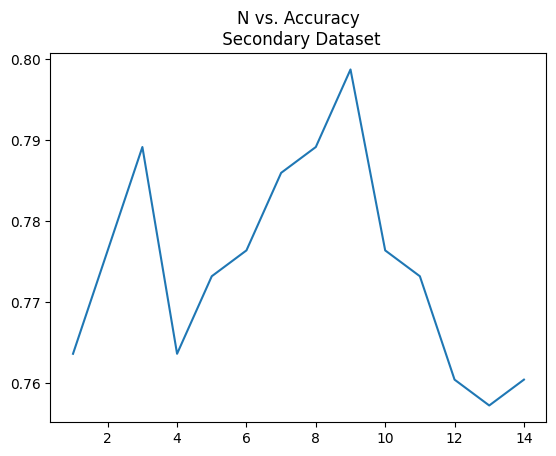

In [11]:
X2_2d_test = X2_test_scaled.loc[:,[names_2d[0],names_2d[1]]]

arr = np.array([])
y2_test = y2_test.squeeze()
for n in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X2_2d_train, y2_train)
    y2_predict = knn.predict(X2_2d_test)
    m = np.mean(y2_predict == y2_test)
    arr = np.append(arr, np.array(m))
plt.plot(range(1, arr.size+1), arr)
plt.title("N vs. Accuracy\n Secondary Dataset")
plt.show()

In [12]:
# Note: the 2-dimensional feature vector is still being used here
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_2d_train, y_train)
y_predict = knn.predict(X_2d_test)
m = np.mean(y_predict == y_test)
arr = np.append(arr, np.array(m))
display(knn.score(X_2d_test, y_test))

misclassified_y = y_test[y_test != y_predict]

0.829332693230917

In [13]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X2_2d_train, y2_train)
y2_predict = knn.predict(X2_2d_test)
m = np.mean(y2_predict == y2_test)
arr = np.append(arr, np.array(m))
display(knn.score(X2_2d_test, y2_test))

misclassified_y2 = y2_test[y2_test != y2_predict]

0.7763578274760383

array([' EcoSport', ' C-MAX', ' Fiesta', ' B-MAX', ' Focus', ' Kuga',
       ' Ka+', ' Edge', ' Galaxy', ' KA', ' Mustang', ' Puma'],
      dtype=object)

(711,)

711

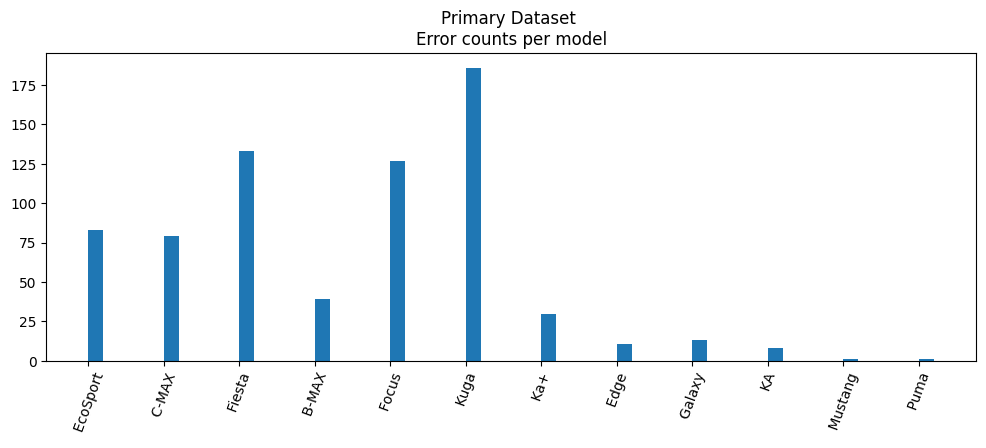

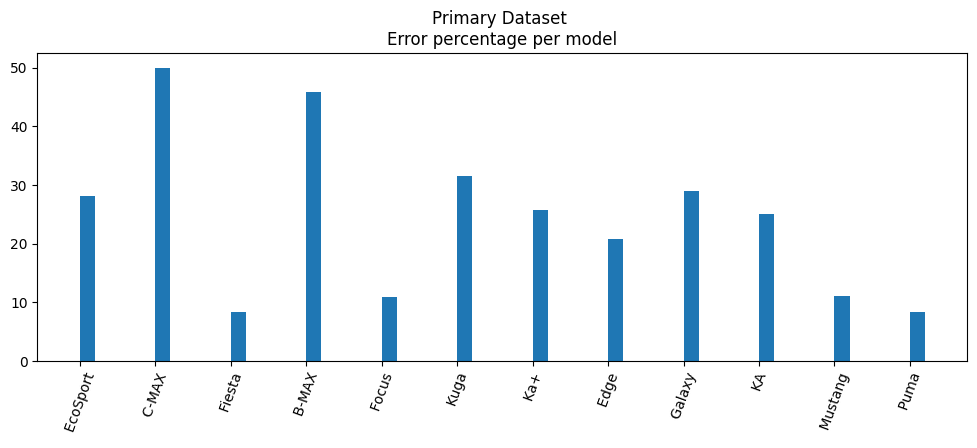

In [14]:
names = misclassified_y.unique()
sum = 0
error_counts = np.array([])
name_counts = np.array([])
for name in names:
    errors = misclassified_y[misclassified_y == name].shape[0]
    sum += errors
    error_counts = np.append(error_counts, np.array(errors))
    name_total = y_test[y_test == name].shape[0]
    name_counts = np.append(name_counts, np.array(name_total))
display(names, misclassified_y.shape, sum)

error_percentage = 100 * error_counts / name_counts



# Plot misclassifications
plt.figure(figsize=(12, 4))
plt.bar(range(error_counts.size), height=error_counts, align='edge', width=0.2)
plt.xticks(range(error_counts.size), names, rotation=70)
plt.title("Primary Dataset \nError counts per model")
plt.show()

plt.figure(figsize=(12, 4))
plt.bar(range(error_counts.size), height=error_percentage, align='edge', width=0.2)
plt.xticks(range(error_counts.size), names, rotation=70)
plt.title("Primary Dataset \nError percentage per model")
plt.show()

array([' Mondeo', ' S-MAX', ' Tourneo Connect', ' Tourneo Custom',
       ' Grand Tourneo Connect', ' Grand C-MAX', ' Fusion', ' Ranger'],
      dtype=object)

(70,)

70

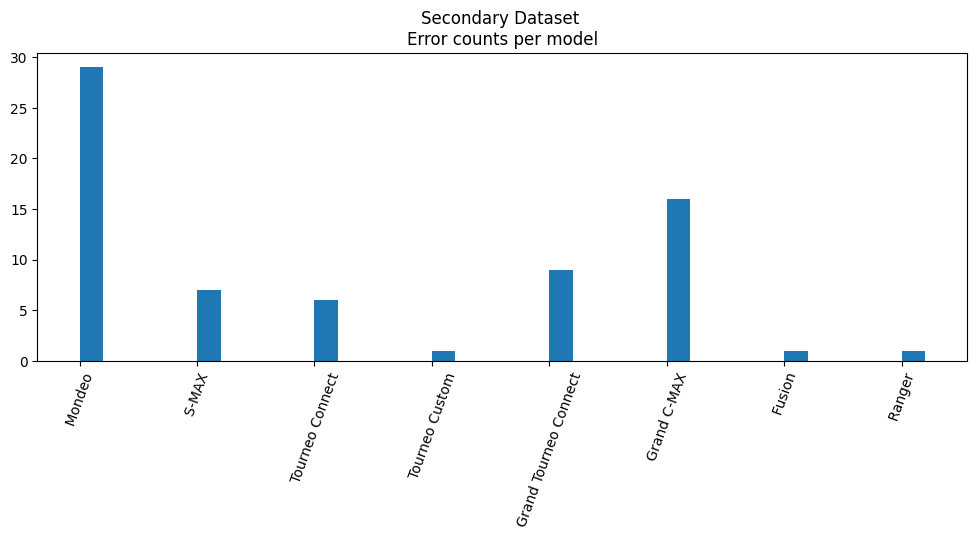

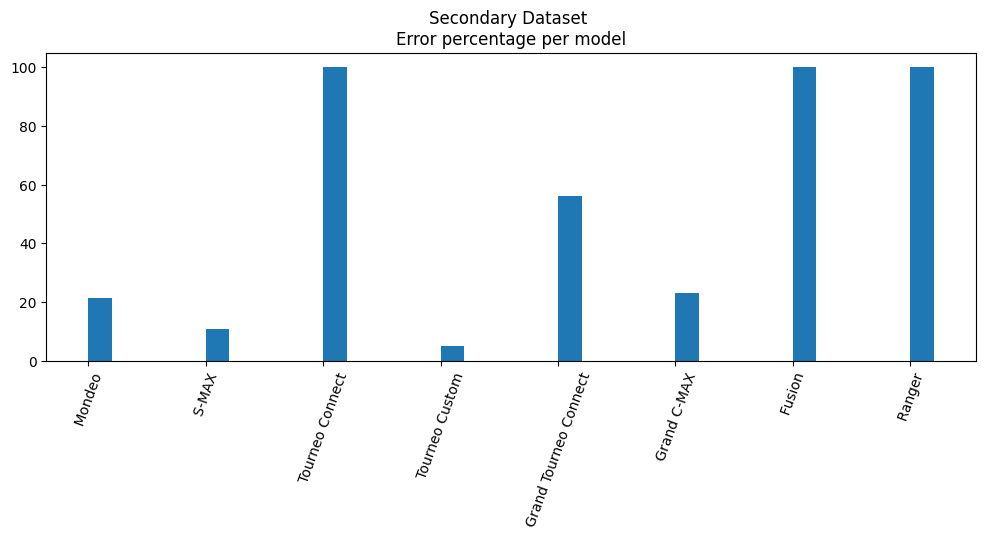

In [15]:
names = misclassified_y2.unique()
sum = 0
error_counts = np.array([])
name_counts = np.array([])
for name in names:
    errors = misclassified_y2[misclassified_y2 == name].shape[0]
    sum += errors
    error_counts = np.append(error_counts, np.array(errors))
    name_total = y2_test[y2_test == name].shape[0]
    name_counts = np.append(name_counts, np.array(name_total))
display(names, misclassified_y2.shape, sum)

error_percentage = 100 * error_counts / name_counts



# Plot misclassifications
plt.figure(figsize=(12, 4))
plt.bar(range(error_counts.size), height=error_counts, align='edge', width=0.2)
plt.xticks(range(error_counts.size), names, rotation=70)
plt.title("Secondary Dataset \nError counts per model")
plt.show()

plt.figure(figsize=(12, 4))
plt.bar(range(error_counts.size), height=error_percentage, align='edge', width=0.2)
plt.xticks(range(error_counts.size), names, rotation=70)
plt.title("Secondary Dataset \nError percentage per model")
plt.show()